<a href="https://colab.research.google.com/github/taniaalwi99/Skripsi-Tuberculosis/blob/main/Tuberculosis_Resize_128x128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
cd //content/drive/MyDrive

/content/drive/MyDrive


In [75]:
ls

'Colab Notebooks'/  'Dataset Gray'/  'Tania Alwi'/   Tuberculosis_VGG-16.ipynb


In [76]:
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import os

In [77]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Dataset Gray")
data = []
labels = []

[INFO] loading images...


In [78]:
for imagePaths in imagePaths:
    a = Image.open(imagePaths)
    image = np.array(a.resize((128,128))) / 255.0
    data.append(image)
    
    label = imagePaths.split(os.path.sep) [-2]
    labels.append(label)

In [79]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, label):
      nilaiy = super().transform(label)
      if self.y_type_== 'binary':
        return np.hstack((nilaiy, 1-nilaiy))
      else:
        return nilaiy
    def inverse_transform(self, nilaiy, threshold=None):
      if self.y_type_ == 'binary':
          return super().inverse_transform(nilaiy[:, 0], threshold)
      else:
          return super().inverse_transform(nilaiy, threshold)

      

lb = MyLabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [80]:
(trainX,testX, trainY, testY) = train_test_split(np.array(data),np.array(labels), test_size=0.20)
print(trainX.shape)
print(testX.shape)

(1120, 128, 128)
(280, 128, 128)


In [81]:
def vgg16(num_classes):

    vgg16 = Sequential()

    vgg16.add(Convolution2D(input_shape=(128,128,1),filters=64,kernel_size=(3,3),padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer1 32*32*64
    vgg16.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer2 16*16*64
    vgg16.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer3 16*16*128
    vgg16.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same",))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer4 8*8*128
    vgg16.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer5 8*8*256
    vgg16.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer6 8*8*256
    vgg16.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer7 4*4*256
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer8 4*4*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer9 4*4*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer10 2*2*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer11 2*2*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))  
    vgg16.add(Activation('relu')) 
    vgg16.add(BatchNormalization())       
    #layer12 2*2*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer13 1*1*512
    vgg16.add(Flatten())
    vgg16.add(Dense(units=4096))
    vgg16.add(Activation('relu')) 
    vgg16.add(BatchNormalization())
    vgg16.add(Dropout(0.5))
    #layer14 4096
    vgg16.add(Dense(units=4096))
    vgg16.add(Activation('relu')) 
    vgg16.add(BatchNormalization())
    vgg16.add(Dropout(0.5))
    #layer16 4096
    vgg16.add(Dense(units=1000))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    vgg16.add(Dropout(0.5)) 
    #layer16 1000
    vgg16.add(Dense(2, activation="softmax"))

    return vgg16

In [82]:
num_classes=2
vgg16=vgg16(num_classes)
vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 activation_48 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_48 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 activation_49 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                 

In [83]:
#setting hyperparameter, menggunakan Adam
opt = Adam(lr=0.001)
vgg16.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 activation_48 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_48 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 activation_49 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 batch_normalization_61 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 4096)              0         
                                                                 
 dense_13 (Dense)            (None, 4096)              16781312  
                                                                 
 activation_62 (Activation)  (None, 4096)              0         
                                                                 
 batch_normalization_62 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 1000)              4097000   
          

In [84]:
#training data
H = vgg16.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=8)

Epoch 1/50
140/140 [==============================] - 15s 82ms/step - loss: 1.0971 - accuracy: 0.7232 - val_loss: 10.3053 - val_accuracy: 0.5286
Epoch 2/50
140/140 [==============================] - 10s 74ms/step - loss: 0.6661 - accuracy: 0.7696 - val_loss: 2.1702 - val_accuracy: 0.5286
Epoch 3/50
140/140 [==============================] - 10s 75ms/step - loss: 0.4741 - accuracy: 0.8411 - val_loss: 4.2631 - val_accuracy: 0.6000
Epoch 4/50
140/140 [==============================] - 11s 80ms/step - loss: 0.3859 - accuracy: 0.8491 - val_loss: 0.2550 - val_accuracy: 0.9143
Epoch 5/50
140/140 [==============================] - 11s 80ms/step - loss: 0.3851 - accuracy: 0.8696 - val_loss: 0.1937 - val_accuracy: 0.9429
Epoch 6/50
140/140 [==============================] - 11s 80ms/step - loss: 0.3657 - accuracy: 0.8652 - val_loss: 0.1761 - val_accuracy: 0.9429
Epoch 7/50
140/140 [==============================] - 11s 77ms/step - loss: 0.3284 - accuracy: 0.8759 - val_loss: 0.2230 - val_accuracy

In [85]:
print("[INFO] evaluating network...")
predictions = vgg16.predict(testX, batch_size=8)
pred=predictions.argmax(axis=1)
testY_argm=testY.argmax(axis=1)


[INFO] evaluating network...


In [86]:
print(classification_report(testY_argm,pred,target_names=lb.classes_))

              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97       148
Tuberculosis       0.95      0.99      0.97       132

    accuracy                           0.97       280
   macro avg       0.97      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280



In [87]:
test_score = vgg16.evaluate(testX, testY) 
print("Test Loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

9/9 [==============================] - 5s 274ms/step - loss: 0.0887 - accuracy: 0.9714
Test Loss 0.0887, accuracy 97.14%


In [88]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap='Blues'):
  if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
  else:
     print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Normalized confusion matrix
[[0.95 0.05]
 [0.01 0.99]]


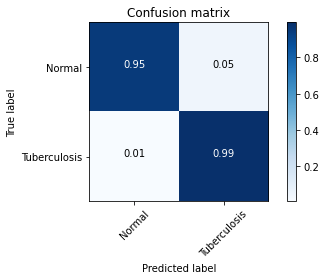

Confusion matrix, without normalization
[[141   7]
 [  1 131]]


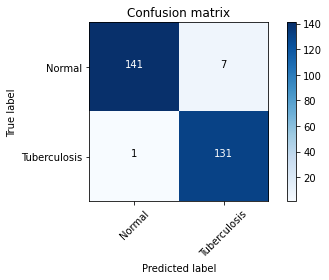

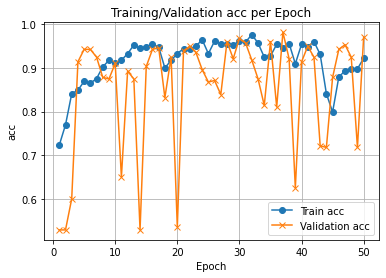

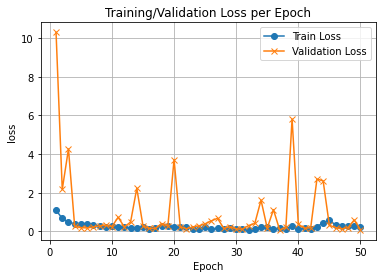

In [89]:
cnf_matrix = confusion_matrix(testY_argm, pred)
np.set_printoptions(precision=2)

# Plot non/normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=True)
plt.show()

plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=False)
plt.show()

f, ax = plt.subplots()
ax.plot([None] + H.history['accuracy'], 'o-')
ax.plot([None] + H.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.grid(True)

f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
plt.grid(True)